In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')




# File to Load (Remember to Change These)
FFS = "fantasystatsall.csv"
FFP = 'Scoring_System_ESPN_Classic.csv'
# FFSPG= "FantasyStatsByGame\MostStatsPerGame.csv"
test_10=r"FantasyStatsByGame\Use_These.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
FFS_df = pd.read_csv(FFS)
FFP_df = pd.read_csv(FFP)
# FFSPG_df = pd.read_csv(FFSPG)
test10_df = pd.read_csv(test_10)

# Combine the data into a single dataset
# data_combine = pd.merge(mouse_data,clinical_data, how='left', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
FFS_df=FFS_df.fillna(0)
FFSPG_df=FFSPG_df.fillna(0)
FFSPG_df.head()
test10_df.head()


,Unnamed: 0,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,...,Passing Redzone Attempts PG,Passing Touchdowns PG,Passing Yards PG,Field Goal Attempts PG,Field Goal Longest,Field Goal Made PG,Field Goal Yards PG,Extra Pts Attempts PG,Extra Pts Made PG,PID
0,0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,...,0.312500,1.500000,212.500000,0.0,0.0,0.0,0.0,0.0,0.0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c
1,1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,...,3.727273,1.272727,223.090909,0.0,0.0,0.0,0.0,0.0,0.0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c
2,2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,...,3.166667,1.416667,206.916667,0.0,0.0,0.0,0.0,0.0,0.0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c
3,3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,...,4.500000,1.937500,244.062500,0.0,0.0,0.0,0.0,0.0,0.0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c
4,4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,...,1.928571,0.857143,193.571429,0.0,0.0,0.0,0.0,0.0,0.0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c


In [233]:




#better way
FP_Calc_DF2 = test10_df

act_list = FFP_df["Activity"].tolist()
pts_list = FFP_df["Points"].tolist()


for i in range (len(act_list)):
   try:
       x = FP_Calc_DF2[act_list[i] + " PG"] * pts_list[i]
       FP_Calc_DF2[act_list[i] + " FP"] = x
   except:
       print(act_list[i] + " not a column in FP_Calc_DF2")


FP_Calc_DF2.head()

2pt Pass Conversions not a column in FP_Calc_DF2
2pt Rush Conversions not a column in FP_Calc_DF2
2pt Receiving Conversions not a column in FP_Calc_DF2
PAT not a column in FP_Calc_DF2
Field Goals Missed not a column in FP_Calc_DF2
FG Made (0-39 yards) not a column in FP_Calc_DF2
FG Made (40-49 yards) not a column in FP_Calc_DF2
FG Made (50+ yards)  not a column in FP_Calc_DF2
Kickoff Return TD not a column in FP_Calc_DF2
Punt return TD not a column in FP_Calc_DF2
Interception Return TD not a column in FP_Calc_DF2
Fumble Return TD not a column in FP_Calc_DF2
Blocked Punt Return TD not a column in FP_Calc_DF2
Blocked FG Return TD not a column in FP_Calc_DF2
2pt Return not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
Sack not a column in FP_Calc_DF2
Blocked Punt, PAT, FG not a column in FP_Calc_DF2
Interception not a column in FP_Calc_DF2
Fumble Recovered not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
0 points allowed (PA0) not a column in FP_Calc_DF2
1-6 poi

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.000,8.437500,6.062500,4.125000,-0.125,18.737500,0.0
2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,2.187500,...,0.0,-0.0,9.431250,1.875,1.475000,2.187500,0.375000,-0.375,14.968750,0.0
2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,0.000000,...,0.0,-0.0,0.000000,0.000,0.000000,0.000000,0.000000,-0.000,0.000000,0.0
2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,3.142857,...,0.0,-0.0,0.157143,0.000,4.428571,3.142857,1.714286,-0.000,9.442857,0.0
2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,3.142857,...,0.0,-0.0,0.250000,0.000,4.835714,3.142857,1.714286,-0.000,9.942857,0.0


In [234]:
#Calc Fantasy Points
FP_Calc_DF2['Total FP PG']= FP_Calc_DF2['Passing Yards FP']+FP_Calc_DF2['Passing Touchdowns FP'] \
                       +FP_Calc_DF2['Passing Interceptions FP']+FP_Calc_DF2['Rush Yards FP'] \
                        +FP_Calc_DF2['Rush Touchdowns FP']+FP_Calc_DF2['Rec Yards FP']+FP_Calc_DF2['Rec Receptions FP']\
                        +FP_Calc_DF2['Rec Touchdowns FP']+FP_Calc_DF2['Lost Fumbles FP']
FP_Calc_DF2.head()


,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.000,8.437500,6.062500,4.125000,-0.125,18.737500,0.0
2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,2.187500,...,0.0,-0.0,9.431250,1.875,1.475000,2.187500,0.375000,-0.375,14.968750,0.0
2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,0.000000,...,0.0,-0.0,0.000000,0.000,0.000000,0.000000,0.000000,-0.000,0.000000,0.0
2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,3.142857,...,0.0,-0.0,0.157143,0.000,4.428571,3.142857,1.714286,-0.000,9.442857,0.0
2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,3.142857,...,0.0,-0.0,0.250000,0.000,4.835714,3.142857,1.714286,-0.000,9.942857,0.0


In [232]:
# FP_Calc=FP_Calc_DF2.to_csv(index=False)

FP_Calc_DF2.to_csv('Data10.csv')

In [235]:
FP_Calc_DF2.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.000,8.437500,6.062500,4.125000,-0.125,18.737500,0.0
2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,2.187500,...,0.0,-0.0,9.431250,1.875,1.475000,2.187500,0.375000,-0.375,14.968750,0.0
2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,0.000000,...,0.0,-0.0,0.000000,0.000,0.000000,0.000000,0.000000,-0.000,0.000000,0.0
2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,3.142857,...,0.0,-0.0,0.157143,0.000,4.428571,3.142857,1.714286,-0.000,9.442857,0.0
2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,3.142857,...,0.0,-0.0,0.250000,0.000,4.835714,3.142857,1.714286,-0.000,9.942857,0.0


In [195]:
FP_Calc_DF2.columns

Index(['Unnamed: 0', 'Key', 'Player Name', 'Player Team', 'Position',
       'Games Played', 'Games Started', 'Season Age',
       'Rec Red Zone Targets PG', 'Rec Receptions PG', 'Rec Touchdowns PG',
       'Rec Yards PG', 'Fumbles PG', 'Lost Fumbles PG', 'Rush Attempts PG',
       'Rush Avg Yards PG', 'Rush Red Zone Attempts PG', 'Rush Scrambles PG',
       'Rush Touchdowns PG', 'Rush Yards PG', 'Passing Completion Pct',
       'Passing Hurries PG', 'Passing Interceptions PG',
       'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
       'Passing Yards PG', 'Field Goal Attempts PG', 'Field Goal Longest',
       'Field Goal Made PG', 'Field Goal Yards PG', 'Extra Pts Attempts PG',
       'Extra Pts Made PG', 'PID', 'Passing Yards FP', 'Passing Touchdowns FP',
       'Passing Interceptions FP', 'Rush Yards FP', 'Rush Touchdowns FP',
       'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP',
       'Lost Fumbles FP', 'Total FP PG', 'Passing_Completion_Pct_adj'],
      dtype

In [236]:
#convert Passing Completion to decimal format 
#remove any player who did not play more than 13 games 
#Set season as INDEX
FP_Calc_DF2['Passing_Completion_Pct_adj']=FP_Calc_DF2['Passing Completion Pct']/100
# FP_Calc_DF2= FP_Calc_DF2[FP_Calc_DF2['Games Played'] >= 10]
# FP_Calc_DF2.set_index("Season", inplace = True) 
FP_Calc_DF2.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.000,8.437500,6.062500,4.125000,-0.125,18.737500,0.0
2012,440,aca06a5e-0e3a-4285-a025-199f8fa0376f 2012 6680...,Jamaal Charles,Chiefs,RB,16,15,26,0.000000,2.187500,...,0.0,-0.0,9.431250,1.875,1.475000,2.187500,0.375000,-0.375,14.968750,0.0
2012,460,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2012 1c1c...,Jamize Olawale,Raiders,FB,3,0,23,0.000000,0.000000,...,0.0,-0.0,0.000000,0.000,0.000000,0.000000,0.000000,-0.000,0.000000,0.0
2012,691,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2012 3340...,Jarius Wright,Vikings,WR,7,1,23,0.285714,3.142857,...,0.0,-0.0,0.157143,0.000,4.428571,3.142857,1.714286,-0.000,9.442857,0.0
2012,771,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2012 f14b...,Brandon LaFell,Panthers,WR,14,12,26,0.142857,3.142857,...,0.0,-0.0,0.250000,0.000,4.835714,3.142857,1.714286,-0.000,9.942857,0.0


In [96]:
#FP_Calc_DF2.to_csv(r'fantasystatsall_NAN.csv')
# FP_Calc_DF2.drop('Unnamed: 0', axis=1)
# FP_Calc_DF2.sort_values((['Player Name','Season']), inplace=True)

In [113]:
FP_Calc_DF2.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.0,8.437500,6.062500,4.125000,-0.125000,18.737500,0.0
2013,164,c9701373-23f6-4058-9189-8d9c085f3c49 2013 ad4a...,A.J. Green,Bengals,WR,16,16,25,1.312500,6.125000,...,0.0,-0.0,0.000000,0.0,8.912500,6.125000,4.125000,-0.000000,19.162500,0.0
2014,165,c9701373-23f6-4058-9189-8d9c085f3c49 2014 ad4a...,A.J. Green,Bengals,WR,13,13,26,0.846154,5.307692,...,0.0,-0.0,0.015385,0.0,8.007692,5.307692,2.769231,-0.307692,15.792308,0.0
2015,166,c9701373-23f6-4058-9189-8d9c085f3c49 2015 ad4a...,A.J. Green,Bengals,WR,16,16,27,1.125000,5.375000,...,0.0,-0.0,0.000000,0.0,8.106250,5.375000,3.750000,-0.125000,17.106250,0.0
2016,167,c9701373-23f6-4058-9189-8d9c085f3c49 2016 ad4a...,A.J. Green,Bengals,WR,10,10,28,0.300000,6.600000,...,0.0,-0.0,0.000000,0.0,9.640000,6.600000,2.400000,-0.000000,18.640000,0.0


In [237]:
# Shift data for analysis (lagged results) 2013 stats become 2012
FP_Calc_DF2_lagX = FP_Calc_DF2


In [241]:
FP_Calc_DF2_lagX.sort_values((['Season']), inplace=True)

In [242]:
FP_Calc_DF2_lagX.head(20)

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.000,0.237500,0.0,8.437500,6.062500,4.125,-0.125000,18.737500,0.00000
2012,77,2142a164-48ad-47d6-bb27-0bc58c6b2e62 2012 9735...,Rob Gronkowski,Patriots,TE,11,11,23,0.000000,5.000000,...,0.0,-0.000,0.000000,0.0,7.181818,5.000000,6.000,-0.181818,18.000000,0.00000
2012,396,67f5e782-f91c-4536-9818-cf4a0e7e821d 2012 ce92...,Matt Prater,Broncos,K,16,0,28,0.000000,0.000000,...,0.0,-0.000,0.000000,0.0,0.000000,0.000000,0.000,-0.000000,0.000000,0.00000
2012,916,9691f874-be36-4529-a7eb-dde22ee4a848 2012 de76...,Andre Roberts,Cardinals,WR,15,15,24,0.066667,4.266667,...,0.0,-0.000,0.193333,0.0,5.060000,4.266667,2.000,-0.000000,11.520000,0.00000
2012,706,cccc9f16-9508-434f-b7a4-9a29cb0cacf9 2012 3340...,Rhett Ellison,Vikings,TE,16,7,24,0.000000,0.437500,...,0.0,-0.000,0.000000,0.0,0.406250,0.437500,0.000,-0.000000,0.843750,0.00000
2012,116,a527b7db-0b52-4379-9e4c-2e08c1fe1bed 2012 9735...,Stephen Gostkowski,Patriots,K,16,0,28,0.000000,0.000000,...,0.0,-0.000,0.000000,0.0,0.000000,0.000000,0.000,-0.000000,0.000000,0.00000
2012,743,218d1644-603e-4da3-9ce1-48ce3927494f 2012 e6aa...,Matt Bryant,Falcons,K,16,0,37,0.000000,0.000000,...,0.0,-0.000,0.000000,0.0,0.000000,0.000000,0.000,-0.000000,0.000000,0.00000
2012,901,fe767946-236d-4c04-9c59-5e3edd51acfe 2012 f0e7...,Michael Crabtree,49ers,WR,16,16,25,0.125000,5.312500,...,0.0,-0.000,0.050000,0.0,6.906250,5.312500,3.375,-0.000000,15.643750,0.00000
2012,447,ecc4f0c1-64e0-46cc-9b58-91c2b215e62a 2012 6680...,Ryan Succop,Chiefs,K,16,0,26,0.000000,0.000000,...,0.0,-0.000,0.000000,0.0,0.000000,0.000000,0.000,-0.000000,0.000000,0.00000


In [243]:
#create unique Dataset for each position

# FP_Calc_DF3.set_index("Position", inplace=True)
Catch=['WR','TE']
FP_Calc_QB =FP_Calc_DF2_lagX[FP_Calc_DF2_lagX.Position == 'QB']

FP_Calc_RB =FP_Calc_DF2_lagX[FP_Calc_DF2_lagX.Position == 'RB']

FP_Calc_Catch =FP_Calc_DF2_lagX[FP_Calc_DF2_lagX.Position.isin(Catch)]


# surveys_df[surveys_df.year == 2002]
FP_Calc_QB.head()

#FP_Calc_Catch.Position.unique()
#FP_Calc_DF3[FP_Calc_DF3.Position == 'QB']

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,389,0847010c-9a77-4f0b-9d63-c8b4b224d263 2012 ce92...,Brock Osweiler,Broncos,QB,5,0,22,0.0,0.0000,...,0.00,-0.000,-0.26000,0.00,0.00000,0.0000,0.0,-0.000,-0.16400,0.50000
2012,554,6cb6226e-f08c-4192-95f1-69709ed686c6 2012 04aa...,Eli Manning,Giants,QB,16,16,31,0.0,0.0000,...,6.50,-1.875,0.18750,0.00,0.00000,0.0000,0.0,-0.125,14.55750,0.59888
2012,643,ade43b1a-0601-4672-83b6-d246bc066a19 2012 c5a5...,Matthew Stafford,Lions,QB,16,16,24,0.0,0.0625,...,5.00,-2.125,0.78750,1.50,0.01875,0.0625,0.0,-0.500,17.16125,0.59835
2012,170,d2a0e5af-3850-4f16-8e40-a0b1d15c2ce1 2012 ad4a...,Andy Dalton,Bengals,QB,16,16,25,0.0,0.0000,...,6.75,-2.000,0.75000,1.50,0.00000,0.0000,0.0,-0.500,15.67250,0.62311
2012,650,0ce48193-e2fa-466e-a986-33f751add206 2012 a204...,Aaron Rodgers,Packers,QB,16,16,29,0.0,0.0625,...,9.75,-1.000,1.61875,0.75,-0.00625,0.0625,0.0,-0.500,21.41250,0.67210


In [205]:
FP_Calc_QB.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,247,64797df2-efd3-4b27-86ee-1d48f7edb09f 2012 ebd8...,Joe Flacco,Ravens,QB,16,16,27,0.0,0.0,...,5.5,-1.250000,0.137500,1.125000,0.0,0.0,0.0,-0.500000,14.555000,0.59699
2012,357,de816e24-8442-49a4-99cd-dde7e7c05863 2012 f7dd...,Blaine Gabbert,Jaguars,QB,10,10,23,0.0,0.0,...,3.6,-1.200000,0.560000,0.000000,0.0,0.0,0.0,-0.600000,9.008000,0.58273
2012,254,7f3ef024-eb34-46af-8b9e-544cdf09378f 2012 ebd8...,Tyrod Taylor,Ravens,QB,7,0,23,0.0,0.0,...,0.0,-0.285714,1.042857,0.857143,0.0,0.0,0.0,-0.000000,2.637143,0.58621
2012,684,250199f2-1387-4b55-b96f-17fedea6db7f 2012 3340...,Joe Webb III,Vikings,QB,1,0,26,0.0,0.0,...,0.0,-0.000000,-0.100000,0.000000,0.0,0.0,0.0,-0.000000,-0.100000,0.00000
2012,301,ea357add-1a41-4a8b-8f34-bbfade7f4d98 2012 cb2f...,Ben Roethlisberger,Steelers,QB,13,13,30,0.0,0.0,...,8.0,-1.230769,0.707692,0.000000,0.0,0.0,0.0,-0.461538,17.061538,0.63252


In [80]:
import seaborn as sns

In [120]:
FP_Calc_DF2.columns

Index(['Unnamed: 0', 'Key', 'Player Name', 'Player Team', 'Position',
       'Games Played', 'Games Started', 'Season Age',
       'Rec Red Zone Targets PG', 'Rec Receptions PG', 'Rec Touchdowns PG',
       'Rec Yards PG', 'Fumbles PG', 'Lost Fumbles PG', 'Rush Attempts PG',
       'Rush Avg Yards PG', 'Rush Red Zone Attempts PG', 'Rush Scrambles PG',
       'Rush Touchdowns PG', 'Rush Yards PG', 'Passing Completion Pct',
       'Passing Hurries PG', 'Passing Interceptions PG',
       'Passing Redzone Attempts PG', 'Passing Touchdowns PG',
       'Passing Yards PG', 'Field Goal Attempts PG', 'Field Goal Longest',
       'Field Goal Made PG', 'Field Goal Yards PG', 'Extra Pts Attempts PG',
       'Extra Pts Made PG', 'PID', 'Passing Yards FP', 'Passing Touchdowns FP',
       'Passing Interceptions FP', 'Rush Yards FP', 'Rush Touchdowns FP',
       'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP',
       'Lost Fumbles FP', 'Total FP PG', 'Passing_Completion_Pct_adj'],
      dtype

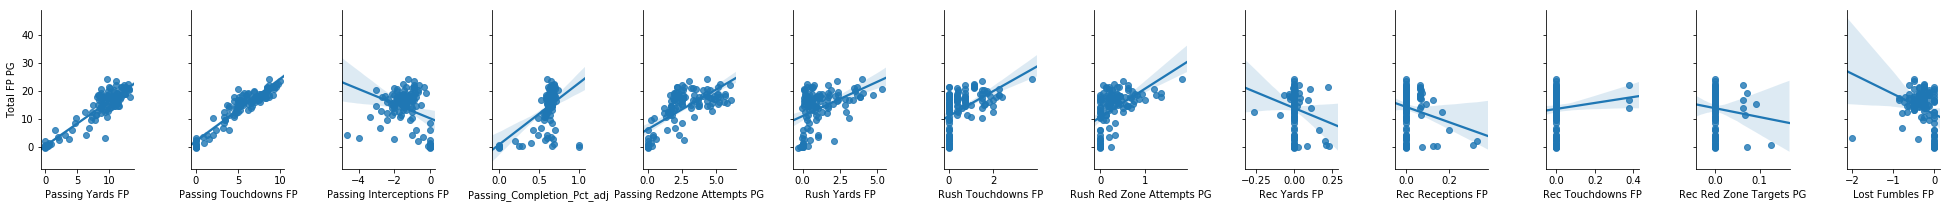

In [125]:
#QB Plot
sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



 

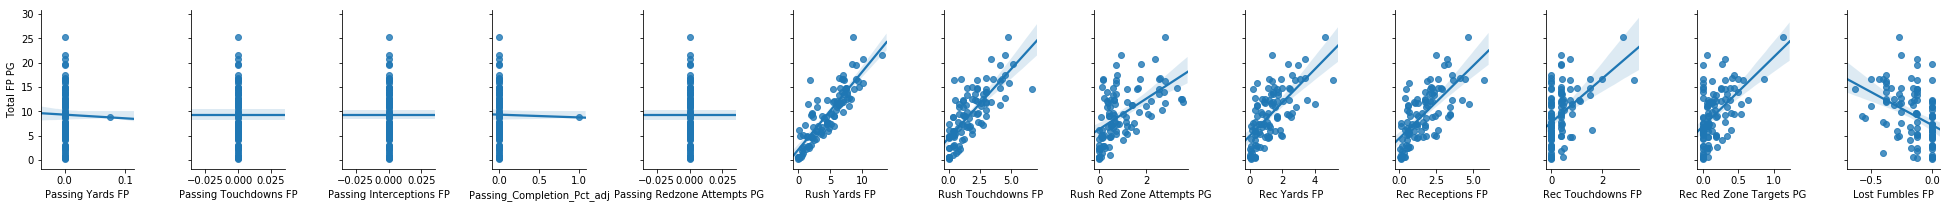

In [83]:
#QB Plot
sns.pairplot(FP_Calc_RB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



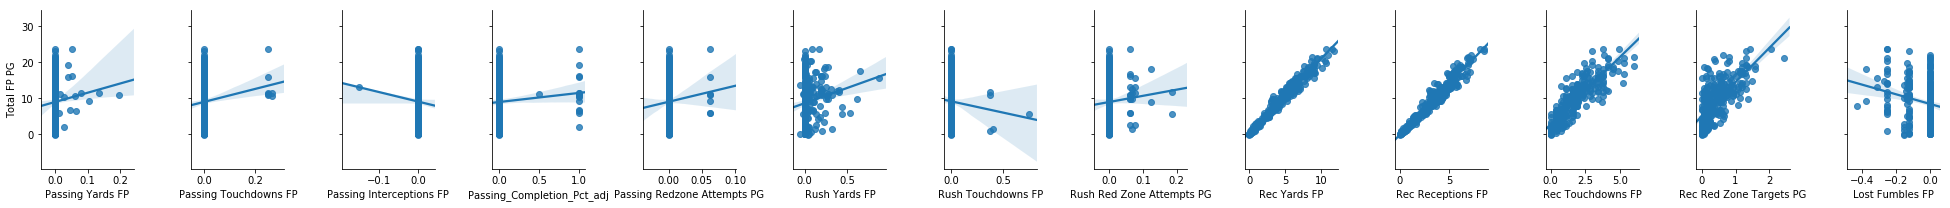

In [13]:
#QB Plot
sns.pairplot(FP_Calc_Catch, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



In [244]:
# features_cols = [ 'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
#        'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',, 'Rec Receptions', 'Rec Red Zone Targets',
#        'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles','Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
#        'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards','Passing Completion Pct','Season Age''Rec Yards FP'
#,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP''Rush Yards FP', 'Passing Completion Pct'

features_cols = ['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']

features_cols_QB=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                    'Rush Yards FP', 'Rush Touchdowns FP']

features_cols_RB = ['Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']

In [259]:
###trransform Y

FP_Calc_DF2_lagY = FP_Calc_DF2

In [264]:
FP_Calc_DF2_lagY_sort=FP_Calc_DF2_lagY.sort_values((['Player Name','Season']))

In [265]:
FP_Calc_DF2_lagY_sort.head()

,Unnamed: 0,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,163,c9701373-23f6-4058-9189-8d9c085f3c49 2012 ad4a...,A.J. Green,Bengals,WR,16,16,24,0.062500,6.062500,...,0.0,-0.0,0.237500,0.0,8.437500,6.062500,4.125000,-0.125000,18.737500,0.0
2013,164,c9701373-23f6-4058-9189-8d9c085f3c49 2013 ad4a...,A.J. Green,Bengals,WR,16,16,25,1.312500,6.125000,...,0.0,-0.0,0.000000,0.0,8.912500,6.125000,4.125000,-0.000000,19.162500,0.0
2014,165,c9701373-23f6-4058-9189-8d9c085f3c49 2014 ad4a...,A.J. Green,Bengals,WR,13,13,26,0.846154,5.307692,...,0.0,-0.0,0.015385,0.0,8.007692,5.307692,2.769231,-0.307692,15.792308,0.0
2015,166,c9701373-23f6-4058-9189-8d9c085f3c49 2015 ad4a...,A.J. Green,Bengals,WR,16,16,27,1.125000,5.375000,...,0.0,-0.0,0.000000,0.0,8.106250,5.375000,3.750000,-0.125000,17.106250,0.0
2016,167,c9701373-23f6-4058-9189-8d9c085f3c49 2016 ad4a...,A.J. Green,Bengals,WR,10,10,28,0.300000,6.600000,...,0.0,-0.0,0.000000,0.0,9.640000,6.600000,2.400000,-0.000000,18.640000,0.0


In [266]:
FP_Calc_DF2_lagY = FP_Calc_DF2.groupby(['Player Name']).shift(-1)

In [267]:
FP_Calc_DF2_lagY.head(15)

,Unnamed: 0,Key,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,164.0,c9701373-23f6-4058-9189-8d9c085f3c49 2013 ad4a...,Bengals,WR,16.0,16.0,25.0,1.312500,6.125000,0.687500,...,0.000000,-0.000000,0.000000,0.000,8.912500,6.125000,4.125000,-0.000000,19.162500,0.00000
2012,461.0,5a20a439-bebc-4ef7-8b9f-30e1d677a26b 2013 1c1c...,Raiders,FB,16.0,1.0,24.0,0.000000,0.437500,0.000000,...,0.000000,-0.000000,0.037500,0.000,0.393750,0.437500,0.000000,-0.000000,0.868750,0.00000
2012,692.0,6a11f09e-268c-4e5a-9b0f-cc0f4bc353c3 2013 3340...,Vikings,WR,16.0,3.0,24.0,0.125000,1.625000,0.187500,...,0.000000,-0.000000,0.000000,0.000,2.712500,1.625000,1.125000,-0.000000,5.462500,0.00000
2012,772.0,5707d2b0-ea9e-4a5e-8289-9d52197301d9 2013 f14b...,Panthers,WR,16.0,16.0,27.0,0.437500,3.062500,0.312500,...,0.000000,-0.000000,0.093750,0.000,3.918750,3.062500,1.875000,-0.000000,8.950000,0.00000
2012,57.0,769d7178-df4e-4127-8166-8116165921e8 2013 5fee...,Jets,WR,12.0,8.0,25.0,0.666667,3.583333,0.250000,...,0.000000,-0.000000,0.091667,0.000,4.358333,3.583333,1.500000,-0.000000,9.533333,0.00000
2012,152.0,b44773b9-af17-4d6c-a453-132e20849712 2013 ad4a...,Bengals,TE,14.0,14.0,25.0,0.285714,3.285714,0.285714,...,0.000000,-0.000000,0.000000,0.000,3.271429,3.285714,1.714286,-0.428571,7.842857,0.00000
2012,124.0,dba5e3ec-2c77-4f65-ad6e-cee246f816ef 2013 9735...,Patriots,RB,12.0,2.0,23.0,0.000000,1.750000,0.000000,...,0.000000,-0.000000,2.258333,1.500,1.266667,1.750000,0.000000,-0.000000,6.775000,0.00000
2012,960.0,7e5b8212-df93-4069-b3f0-be4b5cb47389 2013 3d08...,Seahawks,WR,15.0,5.0,23.0,0.666667,1.466667,0.266667,...,0.000000,-0.000000,0.000000,0.000,2.306667,1.466667,1.600000,-0.133333,5.240000,0.00000
2012,330.0,b8426cea-f8b9-4061-8d56-e70d1230103e 2013 82cf...,Colts,WR,16.0,10.0,24.0,0.875000,5.125000,0.312500,...,0.000000,-0.000000,0.037500,0.000,6.768750,5.125000,1.875000,-0.000000,13.806250,0.00000


In [268]:
FP_Calc_QB_Y =FP_Calc_DF2_lagY[FP_Calc_DF2_lagY.Position == 'QB']

FP_Calc_RB_Y =FP_Calc_DF2_lagY[FP_Calc_DF2_lagY.Position == 'RB']

FP_Calc_Catch_Y =FP_Calc_DF2_lagY[FP_Calc_DF2_lagY.Position.isin(Catch)]


In [271]:
print(len(FP_Calc_QB_Y))

120


In [280]:
FP_Calc_QB_x =FP_Calc_QB

FP_Calc_QB_x=FP_Calc_QB[FP_Calc_QB_x.index != 2018]
        
x = FP_Calc_QB_x[features_cols_QB]
x.tail()

# # xRB = FP_Calc_RB[features_cols_RB]

# # xRB

# print(len(x))

,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP
Season,,,,,
2017,7.353333,4.666667,-1.000000,1.300000,0.0
2017,10.232500,6.750000,-1.625000,1.118750,1.5
2017,8.688000,4.800000,-2.400000,1.640000,0.0
2017,10.778667,6.933333,-0.666667,2.366667,0.4
2017,0.226667,0.000000,-0.000000,-0.066667,0.0


In [ ]:
FP_Calc_DF2_lagX.sort_values((['Season']), inplace=True)

In [258]:
# .groupby(['Player Name']).shift(-1)


FP_Calc_DF2_lagY.head()

,Unnamed: 0,Key,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,164.0,c9701373-23f6-4058-9189-8d9c085f3c49 2013 ad4a...,Bengals,WR,16.0,16.0,25.0,1.312500,6.125000,0.687500,...,0.0,-0.0,0.0,0.0,8.912500,6.125000,4.125000,-0.0,19.162500,0.0
2012,78.0,2142a164-48ad-47d6-bb27-0bc58c6b2e62 2013 9735...,Patriots,TE,7.0,6.0,24.0,1.142857,5.571429,0.571429,...,0.0,-0.0,0.0,0.0,8.457143,5.571429,3.428571,-0.0,17.457143,0.0
2012,397.0,67f5e782-f91c-4536-9818-cf4a0e7e821d 2013 ce92...,Broncos,K,16.0,0.0,29.0,0.000000,0.000000,0.000000,...,0.0,-0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.0,0.000000,0.0
2012,917.0,9691f874-be36-4529-a7eb-dde22ee4a848 2013 de76...,Cardinals,WR,16.0,2.0,25.0,0.375000,2.687500,0.125000,...,0.0,-0.0,0.0,0.0,2.943750,2.687500,0.750000,-0.0,6.381250,0.0
2012,707.0,cccc9f16-9508-434f-b7a4-9a29cb0cacf9 2013 3340...,Vikings,TE,11.0,6.0,25.0,0.272727,0.454545,0.090909,...,0.0,-0.0,0.0,0.0,0.554545,0.454545,0.545455,-0.0,1.554545,0.0


In [255]:
FP_Calc_QB_y.head()

,Unnamed: 0,Key,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,651.0,0ce48193-e2fa-466e-a986-33f751add206 2013 a204...,Packers,QB,9.0,9.0,30.0,0.0,0.0,0.0,...,7.555556,-1.333333,1.333333,0.000,0.0,0.0,0.0,-0.000000,18.826667,0.66552
2013,652.0,0ce48193-e2fa-466e-a986-33f751add206 2014 a204...,Packers,QB,16.0,16.0,31.0,0.0,0.0,0.0,...,9.500000,-0.625000,1.681250,0.750,0.0,0.0,0.0,-0.250000,22.008750,0.65577
2014,653.0,0ce48193-e2fa-466e-a986-33f751add206 2015 a204...,Packers,QB,16.0,16.0,32.0,0.0,0.0,0.0,...,7.750000,-1.000000,2.150000,0.375,0.0,0.0,0.0,-0.500000,18.327500,0.60664
2015,654.0,0ce48193-e2fa-466e-a986-33f751add206 2016 a204...,Packers,QB,16.0,16.0,33.0,0.0,0.0,0.0,...,10.000000,-0.875000,2.306250,1.500,0.0,0.0,0.0,-0.500000,23.501250,0.65738
2016,655.0,0ce48193-e2fa-466e-a986-33f751add206 2017 a204...,Packers,QB,7.0,7.0,34.0,0.0,0.0,0.0,...,9.142857,-1.714286,1.800000,0.000,0.0,0.0,0.0,-0.285714,18.514286,0.64706


In [272]:
target_cols = ['Total FP PG']

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Season', length=140)

In [273]:
FP_Calc_QB_y =FP_Calc_QB_Y
# [FP_Calc_QB.index != 2012]
y = FP_Calc_QB_y[target_cols]
y

# print(len(FP_Calc_QB_y)),print(len(FP_Calc_QB_x))
y.head()




,Total FP PG
Season,
2012,12.723750
2012,4.146667
2012,2.026667
2012,0.518750
2012,16.177500


In [274]:
print(len(FP_Calc_QB_y)),print(len(FP_Calc_QB_x))

120
120


(None, None)

In [ ]:
from sklearn.model_selection import train_test_split

In [276]:
x_train = x[x.index != 2017]
y_train = y[y.index != 2017]
x_test = x[x.index == 2017]
y_test = y[y.index == 2017]




# xRB_train = xRB[xRB.index < 2018]
# yRB_train = yRB[yRB.index < 2018]
# xRB_test = xRB[xRB.index == 2018]
# yRB_test = yRB[yRB.index == 2018]

In [277]:
# x_train = x_train.sort_index() 
# y_train = y_train.sort_index() 
print(len(x_train)),print(len(y_train))

100
100


(None, None)

In [172]:
x_train.head(),y_train.head()

(        Passing Yards FP  Passing Touchdowns FP  Passing Interceptions FP  \
 Season                                                                      
 2012            9.780000               4.750000                 -2.750000   
 2012            6.413333               1.333333                 -4.666667   
 2012            0.026667               0.000000                 -0.666667   
 2012            0.000000               0.000000                 -0.000000   
 2012           10.652500               7.000000                 -1.750000   
 
         Rush Yards FP  Rush Touchdowns FP  
 Season                                     
 2012         0.818750               0.375  
 2012         1.066667               0.000  
 2012         2.133333               0.000  
 2012         0.000000               0.000  
 2012         0.618750               0.375  ,         Total FP PG
 Season             
 2013      21.412500
 2014      18.826667
 2015      22.008750
 2016      18.327500
 2017      

In [173]:
y_train.head()

,Total FP PG
Season,
2013,21.412500
2014,18.826667
2015,22.008750
2016,18.327500
2017,23.501250


In [278]:
print(x_train.shape),print(y_train.shape)

(100, 5)
(100, 1)


(None, None)

In [177]:
y_train.head()

,Total FP PG
Season,
2012,21.412500
2013,18.826667
2014,22.008750
2015,18.327500
2016,23.501250


In [ ]:
print(x_test.shape),print(y_test.shape), print(results.predict.shape)
#https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression

In [174]:
# y_train['Season']=y_train.index-1

In [176]:
y_train.set_index("Season",inplace=True)

In [178]:
y_train.head()

,Total FP PG
Season,
2012,21.412500
2013,18.826667
2014,22.008750
2015,18.327500
2016,23.501250


In [179]:
print(x_train.shape),print(y_train.shape)

(120, 5)
(120, 1)


(None, None)

In [279]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)
y_train = list(y_train)
results = model.fit()
# .astype(float)
results.summary()

# xRB_train = sm.add_constant(xRB_train)
# model = sm.OLS(yRB_train,xRB_train)
# RBresults = model.fit()
# # .astype(float)
# RBresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total FP PG   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.4148
Date:                Fri, 14 Jun 2019   Prob (F-statistic):              0.837
Time:                        22:23:48   Log-Likelihood:                -333.69
No. Observations:                 100   AIC:                             679.4
Df Residuals:                      94   BIC:                             695.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       13.6766      1.599      8.555      0.000      10.503      16.851
Passing Yards FP            -0.2230      0.535     -0.416      0.678      -1.286       0.840
Passing Touchdowns FP        0.3588      0.620      0.578      0.564      -0.873       1.590
Passing Interceptions FP     0.5819      1.127      0.516      0.607      -1.657       2.820
Rush Yards FP               -0.0293      0.769     -0.038      0.970      -1.555       1.497
Rush Touchdowns FP           0.9699      1.230      0.788      0.432      -1.472       3.412
==============================================================================
Omnibus:                       11.706   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.976
Skew:                          -0.855   Prob(JB):                      0.00152
Kurtosis:                       2.564   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
FP_Calc_DF2.to_csv(r'Stats.csv')

In [ ]:
predictions=results.predict(x_test)

In [ ]:
x_test.head()

In [ ]:
est.head

In [ ]:
est

In [ ]:
results.predict(x_test)

In [ ]:
results.predict

In [ ]:
x_test


In [ ]:
y_test